# Analyse exploratoire du jeu de données Arbres dans Paris

## Table des matières

* [Présentation générale du jeu de données](#part1)
   
* [Traitement et analyse du jeu de données](#part2)
   * [Nettoyage du jeu de données](#part21)
     * [Erreurs de types](#part211)
	 * [Valeurs manquantes](#part212)
	 * [Valeurs abérantes](#part213)
	 * [Doublons](#part214)
   * [Analyses univariées](#part22)
     * [Répartition des observations](#part221)
	 * [Distributions empiriques](#part222)
	 * [Mesures de tendances centrales](#part223)
	 * [Mesures de dispersion et de forme](#part224)
   * [Analyses bivariées](#part23)
     * [Domanialité et hauteur](#part231)
	 * [Domanialité et circonférence](#part232)
	 * [Arrondissement et hauteur](#part233)
	 * [Arrondissement et circonférence](#part234)
	 * [Domanialité et arrondissement](#part235)
* [Synthèse de l'analyse](#part3)

## Présentation générale du jeu de données <a class="anchor" id="part1"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
arbres = pd.read_csv("p2-arbres-fr.csv", sep=";")
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
arbres.shape

(200137, 18)

In [4]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

**Conclusion**: Notre jeu de données représente donc un échantillon de taille 200137 arbres, décris suivant 18 caractéristiques.
On distingue des caractéristiques/variables:
- **Qualitatives nominales**: id, numero, type_emplacement, domanialite, arrondissement, complement_addresse, numero, lieu, id_emplacement, libelle_francais, genre, espece, variete
- **Qualitatives ordinales**: stade_developpement, geo_point_2d_a, geo_point_2d_b
- **Quantitatives continue**: circonference_cm, hauteur_m

## Traitement et analyse du jeu de données <a class="anchor" id="part2"></a>

Avant de mener une quelconque analyse de notre jeu de données, nous commençons par y détecter et corriger divers type d'erreurs.

### Nettoyage du jeu de données <a class="anchor" id="part21"></a>

#### Erreurs de type <a class="anchor" id="part211"></a>

In [5]:
arbres.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Au niveau du type des données, tout semble correct pour chaque variable.

#### Valeurs manquantes <a class="anchor" id="part212"></a>

In [6]:
print("Valeurs manquantes par variables\n\n", arbres.isnull().sum())
arbres.isnull().sum()
print("\n\nProportion des valeurs manquantes")
(arbres.isnull().sum().sum()/(arbres.shape[0]*arbres.shape[1]))*100

Valeurs manquantes par variables

 id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


Proportion des valeurs manquantes


18.495691562390874

In [7]:
print("Proportion des valeurs manquantes par variables\n\n", ((arbres.isnull().sum()/arbres.shape[0])*100).sort_values())

Proportion des valeurs manquantes par variables

 id                       0.000000
hauteur_m                0.000000
circonference_cm         0.000000
geo_point_2d_a           0.000000
id_emplacement           0.000000
lieu                     0.000000
geo_point_2d_b           0.000000
arrondissement           0.000000
type_emplacement         0.000000
domanialite              0.000500
genre                    0.007995
libelle_francais         0.747988
espece                   0.875400
remarquable             31.527404
stade_developpement     33.579498
variete                 81.624088
complement_addresse     84.559577
numero                 100.000000
dtype: float64


Notre jeu de données comporte près de 19% de données manquantes. La variable numero est totalement manquante, suivi des variables complement_address et variete qui comporte plus de 80% de données manquantes. Les variables remarquable et espece quant à elles, ont près du tier de leurs données manquantes. Par ailleurs, les variables espece, libelle_francais, genre et domanialite comporte moins de 1% de leurs données manquantes.

Analysons de plus près ces données manquantes.

In [8]:
arbres.loc[arbres["domanialite"].isnull(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


Analysons les autres arbres dans l'arrondissement de PARIS 20E situé à "JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ..."

In [9]:
arbres.loc[arbres["lieu"].str.contains("JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...", case=False),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
10470,112685,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105004,Pommier à fleurs,Malus,trilobata,NaN,35,4,JA,0.0,48.849399,2.414360
10471,112686,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105005,Peuplier,Populus,alba,Pyramidalis',330,18,M,0.0,48.849375,2.414330
10472,112687,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105003,Sophora,Sophora,japonica,NaN,120,12,A,0.0,48.849446,2.414183
10646,112915,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,102002,Tilleul,Tilia,platyphyllos,NaN,140,16,A,0.0,48.849841,2.413391
10647,112916,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,102003,Tilleul,Tilia,platyphyllos,NaN,120,16,A,0.0,48.849874,2.413448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197248,2020920,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201007,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,15,4,J,0.0,48.849770,2.413760
197249,2020921,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201012,Pommier à fruits,Malus,Fruit n. sp.,NaN,20,4,J,0.0,48.849658,2.413831
197250,2020922,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,202003,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,20,3,J,0.0,48.849599,2.413899
197251,2020923,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201006,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,25,3,J,0.0,48.849759,2.413875


In [10]:
arbres.loc[arbres["lieu"].str.contains("JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...", case=False),"domanialite"].value_counts()

Jardin    60
Name: domanialite, dtype: int64

On peut donc remplacer la valeur manquante par "Jardin"

In [3]:
arbres.loc[arbres["domanialite"].isnull(),"domanialite"]="Jardin"

Nous procédons de manière similaire pour genre, libelle_francais et espece.

In [12]:
arbres.loc[arbres["genre"].isnull(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
195404,2018848,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,102027,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821289,2.354485
195409,2018853,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104005,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821259,2.354242
195410,2018854,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821229,2.354212
195475,2018919,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104030,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821281,2.353322
195476,2018920,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104031,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821289,2.353228
195487,2018932,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821294,2.352001
195496,2018942,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105017,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821292,2.351425
195497,2018943,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105019,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821260,2.351363
195499,2018945,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105022,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821261,2.351296
195502,2018948,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105025,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821283,2.351094


In [13]:
arbres.loc[arbres["lieu"].str.contains("PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP..", case=False),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
18171,121706,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,101001,Cerisier à fleurs,Prunus,serrulata,NaN,100,6,A,0.0,48.821102,2.355105
18172,121707,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,102011,Arbre aux quarante écus,Ginkgo,biloba,NaN,160,16,A,0.0,48.821195,2.355037
18173,121708,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,101002,Pin,Pinus,nigra,NaN,125,10,A,0.0,48.821135,2.355037
18174,121709,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,102008,Cerisier à fleurs,Prunus,serrulata,NaN,95,8,A,0.0,48.821232,2.355097
18175,121710,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,101006,Cèdre,Cedrus,libani,NaN,145,12,A,0.0,48.821246,2.354793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195516,2018962,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104021,Pin,Pinus,sylvestris,NaN,0,0,NaN,0.0,48.821302,2.353800
195517,2018963,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104022,Erable,Acer,campestre,NaN,0,0,NaN,0.0,48.821266,2.353752
195518,2018964,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104023,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821298,2.353718
195519,2018965,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104025,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821305,2.353505


Les observations de la variable *genre* pour le lieu concernant notre valeur manquante étant variées, on ne peux estimer une valeur cohérente pour remplacer les valeurs manquantes. Pour la suite, si nous souhaitons faire une analyse impliquant la variable *genre*, on supprimera toutes les lignes contenant les valeurs manquantes pour cette variable, ou alors on remplacera la valeur manquante par la valeur ***Non défini***.

In [14]:
arbres.loc[arbres["libelle_francais"].isnull(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
528,100589,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,P0120631,NaN,Crataegus,japonica,NaN,43,3,A,0.0,48.855173,2.301484
1416,101521,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,PARC DE BERCY,922,NaN,Cladrastis,lawsoniana,NaN,95,5,A,0.0,48.833494,2.386041
2727,103209,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0114,NaN,Pinus,sylvestris,Merrill',0,0,NaN,0.0,48.889880,2.316044
5282,106682,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,P0090538,NaN,Sorbus,aria,Pissardii',13,4,J,0.0,48.855603,2.299866
5287,106687,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,P0090543,NaN,Staphylea,colchica,Pissardii',17,4,J,0.0,48.855281,2.300487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200120,2024729,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170139,NaN,Magnolia,obovata,NaN,0,0,NaN,0.0,48.821438,2.458536
200121,2024730,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170140,NaN,Magnolia,delavayi subsp. potaninii,NaN,0,0,NaN,0.0,48.821592,2.458582
200128,2024737,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170147,NaN,Parrotia,n. sp.,NaN,0,0,NaN,0.0,48.820787,2.454569
200129,2024738,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170148,NaN,Non spécifié,sinensis,NaN,0,0,NaN,0.0,48.821991,2.454676


In [15]:
arbres.loc[arbres["libelle_francais"].isnull(),"arrondissement"].value_counts()

BOIS DE VINCENNES    212
PARIS 15E ARRDT      166
PARIS 14E ARRDT      164
PARIS 12E ARRDT      128
PARIS 13E ARRDT      120
PARIS 19E ARRDT      112
PARIS 16E ARRDT       98
PARIS 20E ARRDT       84
PARIS 18E ARRDT       82
PARIS 7E ARRDT        62
PARIS 17E ARRDT       50
PARIS 5E ARRDT        39
PARIS 1ER ARRDT       30
PARIS 10E ARRDT       27
BOIS DE BOULOGNE      26
PARIS 8E ARRDT        16
VAL-DE-MARNE          16
PARIS 11E ARRDT       15
PARIS 6E ARRDT        13
SEINE-SAINT-DENIS      9
PARIS 4E ARRDT         8
PARIS 3E ARRDT         8
PARIS 9E ARRDT         6
HAUTS-DE-SEINE         3
PARIS 2E ARRDT         3
Name: arrondissement, dtype: int64

In [16]:
arbres.loc[arbres["espece"].isnull(),:]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1725,101858,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,D0030002,Pommier à fleurs,Malus,NaN,Aldenhamensis',40,4,NaN,NaN,48.880684,2.387536
2323,102582,Arbre,Jardin,PARIS 16E ARRDT,82 à 90,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,408032,Cornouiller,Cornus,NaN,Eddie's White Wonder',25,3,JA,0.0,48.872087,2.277040
2733,103215,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0167,Cerisier à fleurs,Prunus,NaN,Accolade',32,0,NaN,NaN,48.890072,2.316124
2742,103224,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0188,Cerisier à fleurs,Prunus,NaN,Accolade',60,0,NaN,NaN,48.890239,2.315838
3944,104827,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE RENE LE GALL,10255,Pommier à fleurs,Malus,NaN,Golden Hornet',40,4,NaN,NaN,48.832854,2.350704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198681,2022754,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE BELLEVILLE,101001,Orme,Ulmus,NaN,Nanguen' LUTECE,35,7,NaN,0.0,48.867032,2.382681
198770,2023014,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE DE LA TOUR SAINT JACQUES / 1 BIS RUE SA...,101002,NaN,Acer,NaN,NaN,20,5,NaN,0.0,48.857891,2.349423
198779,2023023,Arbre,Jardin,PARIS 4E ARRDT,NaN,NaN,SQUARE DE LA TOUR SAINT JACQUES / 1 BIS RUE SA...,103002,NaN,Acer,NaN,NaN,20,5,NaN,0.0,48.857907,2.348225
198784,2023029,Arbre,Alignement,PARIS 1ER ARRDT,NaN,NaN,PORT DES TUILERIES,101044,NaN,Pyrus,NaN,NaN,20,5,NaN,0.0,48.862171,2.325637


Les variables libelle_francais et espece ne présentant pas de corrélation au niveau des valeurs manquantes, on décide temporairement d'attribuer pour ces variables la valeur ***Non spécifié***

In [4]:
arbres.loc[arbres["genre"].isnull(),"genre"]="Non spécifié"

In [5]:
arbres.loc[arbres["libelle_francais"].isnull(),"libelle_francais"]="Non spécifié"

In [6]:
arbres.loc[arbres["espece"].isnull(),"espece"]="Non spécifié"

On se limitera à ces variables pour la suite de notre analyse et supprimerons les variables dont la proportion de valeurs manquantes est supérieures à 75%. Pour les deux autres dont la proportion est d'environ un tiers, on pourra les nettoyer avec un procédé similaire si elles s'avèrent pertinentes par la suite.

In [7]:
arbres.drop(["variete", "complement_addresse", "numero"], inplace=True, axis=1)

In [21]:
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200137 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     200137 non-null  object 
 7   genre                200137 non-null  object 
 8   espece               200137 non-null  object 
 9   circonference_cm     200137 non-null  int64  
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          137039 non-null  float64
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), in

#### Valeurs aberrantes <a class="anchor" id="part213"></a>

In [22]:
arbres.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,250255.000000,881818.000000,1.000000,48.911485,2.469759


Les valeurs maximales des variables circonference_cm et hauteur_m montrent des dimensions anormales pour des arbres. On devra donc avec des outils plus adéquats analyser ces variables afin d'en extraire les outliers.

#### Doublons <a class="anchor" id="part214"></a>

In [23]:
arbres.loc[arbres[["domanialite", "arrondissement", "lieu", "genre", "espece", "circonference_cm", "hauteur_m", "geo_point_2d_a", "geo_point_2d_b"]].duplicated(keep=False),:]

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
10099,112286,Arbre,Jardin,PARIS 12E ARRDT,JARDIN PARTAGE BEL-AIR,5,Ailante,Ailanthus,altissima,0,0,NaN,NaN,48.838318,2.406610
10100,112287,Arbre,Jardin,PARIS 12E ARRDT,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,0,0,NaN,NaN,48.838318,2.406610
185479,2006187,Arbre,Alignement,BOIS DE VINCENNES,ROUTE DAUPHINE,402029,Tilleul,Tilia,platyphyllos,0,0,NaN,0.0,48.829912,2.439665
185480,2006188,Arbre,Alignement,BOIS DE VINCENNES,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,0,0,NaN,0.0,48.829912,2.439665


La variable id_emplacement n'étant pas la même pour ces doublons apparents, on peut conclure qu'il s'agit de jeunes arbres très proches et ne pouvons donc pas les considérer comme des doublons.

### Analyses univariées <a class="anchor" id="part22"></a>

#### Répartition des observations <a class="anchor" id="part221"></a>

In [24]:
arbres.nunique()

id                     200137
type_emplacement            1
domanialite                 9
arrondissement             25
lieu                     6921
id_emplacement          69040
libelle_francais          192
genre                     175
espece                    540
circonference_cm          531
hauteur_m                 143
stade_developpement         4
remarquable                 2
geo_point_2d_a         200107
geo_point_2d_b         200114
dtype: int64

In [25]:
arbres['arrondissement'].value_counts(normalize=True)*100

PARIS 15E ARRDT      8.569630
PARIS 13E ARRDT      8.350280
PARIS 16E ARRDT      8.195886
PARIS 20E ARRDT      7.664750
PARIS 19E ARRDT      6.849808
PARIS 12E ARRDT      6.295687
SEINE-SAINT-DENIS    5.781040
BOIS DE VINCENNES    5.751061
PARIS 14E ARRDT      5.695599
PARIS 17E ARRDT      5.377317
PARIS 18E ARRDT      5.002074
PARIS 7E ARRDT       4.305551
VAL-DE-MARNE         3.787406
PARIS 8E ARRDT       3.620020
PARIS 11E ARRDT      2.827063
HAUTS-DE-SEINE       2.647187
BOIS DE BOULOGNE     1.987638
PARIS 10E ARRDT      1.691341
PARIS 4E ARRDT       1.369062
PARIS 5E ARRDT       1.183190
PARIS 6E ARRDT       0.881396
PARIS 1ER ARRDT      0.706016
PARIS 3E ARRDT       0.604086
PARIS 9E ARRDT       0.583101
PARIS 2E ARRDT       0.273812
Name: arrondissement, dtype: float64

In [26]:
arbres['domanialite'].value_counts(normalize=True)*100

Alignement      52.438580
Jardin          23.115666
CIMETIERE       15.952073
DASCO            3.208802
PERIPHERIQUE     2.661677
DJS              1.948665
DFPE             0.662046
DAC              0.010493
DASES            0.001999
Name: domanialite, dtype: float64

In [27]:
arbres['hauteur_m'].value_counts(normalize=True)*100

0       19.596077
10      14.306200
5       13.163483
15       8.608103
8        6.809336
          ...    
5155     0.000500
218      0.000500
91       0.000500
219      0.000500
255      0.000500
Name: hauteur_m, Length: 143, dtype: float64

In [28]:
arbres['circonference_cm'].value_counts(normalize=True)*100

0       12.924647
20       4.852176
70       3.387679
60       3.182320
80       3.100876
          ...    
357      0.000500
485      0.000500
1125     0.000500
1205     0.000500
511      0.000500
Name: circonference_cm, Length: 531, dtype: float64

In [29]:
arbres['espece'].value_counts(normalize=True)*100

x hispanica      18.192038
hippocastanum    10.012641
japonica          5.906954
n. sp.            4.528398
tomentosa         4.477933
                   ...    
muehlenbergii     0.000500
camphora          0.000500
verticillata      0.000500
koraiensis        0.000500
pekinensis        0.000500
Name: espece, Length: 540, dtype: float64

In [30]:
arbres['genre'].value_counts(normalize=True)*100

Platanus        21.280923
Aesculus        12.661827
Tilia           10.767624
Acer             9.229178
Sophora          5.910951
                  ...    
Xanthoceras      0.000500
Ziziphus         0.000500
Sciadopitys      0.000500
Brachychiton     0.000500
Maackia          0.000500
Name: genre, Length: 175, dtype: float64

- La plus part des arbres sont répartis entre les 12e, 13e, 14e, 15e, 16e, 17e, 18e, 19e et 20e arrondissements;
- Ils sont pour la plus part dans les cimétières, les jardins ou en alignement;
- Certains arbres possèdent des hauteurs et des circonferences de 0; certainement il s'agit de jeune arbres et la dimension étant inférieure à l'unité a été ramenée à 0;
- Les arbres dont la hauteur est supérieure à 30 mètres devraient être d'avantage analysés dans une perspective de données abérrantes, également ceux d'une circonférence supérieure à 1000 cm;
- La plus part des arbres sont soit des espèces *x hispanica*, *japonica*, *tomentosa* ou *hippocastanum*; soit des genres *Platanus*, *Aesculus*, *Tilia*, *Acer* ou *Sophora*

#### Distributions empiriques <a class="anchor" id="part222"></a>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

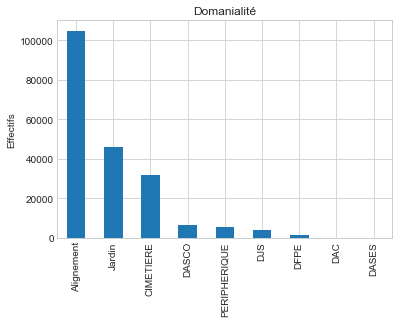

In [9]:
arbres["domanialite"].value_counts().plot(kind='bar')
plt.title('Domanialité')
plt.ylabel('Effectifs')
plt.show()

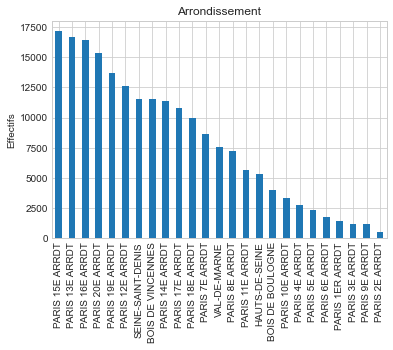

In [10]:
arbres["arrondissement"].value_counts().plot(kind='bar')
plt.title('Arrondissement')
plt.ylabel('Effectifs')
plt.show()

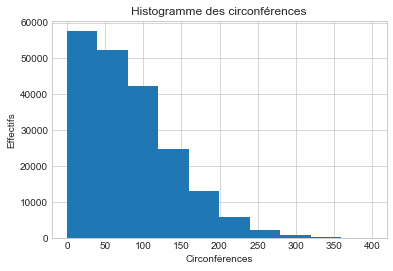

In [12]:
arbres[arbres.circonference_cm<400]["circonference_cm"].hist()
plt.xlabel('Circonférences')
plt.ylabel('Effectifs')
plt.title("Histogramme des circonférences")
plt.show()

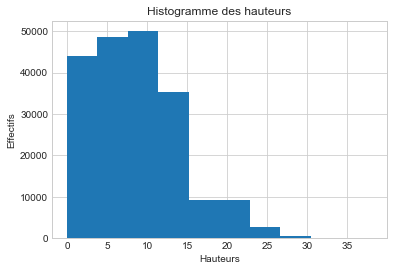

In [13]:
arbres[arbres.hauteur_m<40]["hauteur_m"].hist()
plt.xlabel('Hauteurs')
plt.ylabel('Effectifs')
plt.title("Histogramme des hauteurs")
plt.show()

La plus part des arbres semblent être de jeunes pousses en alignement dans le 15e arrondissement.

#### Mesure de tendances centrales pour hauteur_m et circonference_cm <a class="anchor" id="part223"></a>

In [36]:
print("="*20)
print("      hauteur_m       ")
print("="*20)
print("")
print("Moyenne: ", arbres['hauteur_m'].mean())
print("Mode: ", arbres["hauteur_m"].mode())
print("Médiane: ", arbres["hauteur_m"].median())
print("")
print("")
print("="*20)
print("  circonference_cm")
print("="*20)
print("")
print("Moyenne: ", arbres['circonference_cm'].mean())
print("Mode: ", arbres["circonference_cm"].mode())
print("Médiane: ", arbres["circonference_cm"].median())

      hauteur_m       

Moyenne:  13.110509301128728
Mode:  0    0
dtype: int64
Médiane:  8.0


  circonference_cm

Moyenne:  83.38047937163043
Mode:  0    0
dtype: int64
Médiane:  70.0


- La moyenne des hauteurs est de 13m et celle des circonférences de 83cm;
- La taille 0 et la circonférence 0 représentent le groupe d'arbres avec le plus d'effectif, preuve que la plus part des arbres sont de jeunes arbres;
- 50% des arbres ont moins de 8 mètres de hauteur et moins de 70cm de circonférence;

#### Mesures de dispersion et de forme <a class="anchor" id="part224"></a>

In [37]:
print("="*20)
print("      hauteur_m       ")
print("="*20)
print("")
print("Taux de dispersion: ", (arbres["hauteur_m"].std()/arbres["hauteur_m"].mean())*100)
print("Asymétrie: ", arbres["hauteur_m"].skew())
print("")
print("")
print("="*20)
print("  circonference_cm")
print("="*20)
print("")
print("Taux de dispersion: ", (arbres["circonference_cm"].std()/arbres["circonference_cm"].mean())*100)
print("Asymétrie: ", arbres["circonference_cm"].skew())

      hauteur_m       

Taux de dispersion:  15035.39901705518
Asymétrie:  447.2941319705096


  circonference_cm

Taux de dispersion:  807.3714832014975
Asymétrie:  298.1566142744793


Ces différentes analyses nous montrent que les valeurs des hauteurs et des circonférences sont très dispersées et nécessitent une extraction des outliers. Pour cela on va supprimer les arbres d'une hauteur supérieure à 70m (*Douglas président l'arbre le plus haut de France mesure 66,84 mètres*) et d'une circonférence supérieure à 1200cm (*les quatres plus gros Sequoia de France dépassent les 12 mètres de circonférence*). Par ailleurs, la distribution des valeurs de hauteur et de circonference présentent une forme asymétrique vers la droite.

In [38]:
arbres_new = arbres.loc[arbres.hauteur_m<70,:]

In [39]:
arbres_new = arbres_new.loc[arbres_new.circonference_cm<1200,:]

In [40]:
print("="*20)
print("      hauteur_m       ")
print("="*20)
print("")
print("Moyenne: ", arbres_new['hauteur_m'].mean())
print("Mode: ", arbres_new["hauteur_m"].mode())
print("Médiane: ", arbres_new["hauteur_m"].median())
print("Taux de dispersion: ", (arbres_new["hauteur_m"].std()/arbres_new["hauteur_m"].mean())*100)
print("")
print("")
print("="*20)
print("  circonference_cm")
print("="*20)
print("")
print("Moyenne: ", arbres_new['circonference_cm'].mean())
print("Mode: ", arbres_new["circonference_cm"].mode())
print("Médiane: ", arbres_new["circonference_cm"].median())
print("Taux de dispersion: ", (arbres_new["circonference_cm"].std()/arbres_new["circonference_cm"].mean())*100)

      hauteur_m       

Moyenne:  8.357006968920217
Mode:  0    0
dtype: int64
Médiane:  8.0
Taux de dispersion:  75.49450911399653


  circonference_cm

Moyenne:  79.85339734860622
Mode:  0    0
dtype: int64
Médiane:  70.0
Taux de dispersion:  80.55586339820677


In [41]:
arbres.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,250255.000000,881818.000000,1.000000,48.911485,2.469759


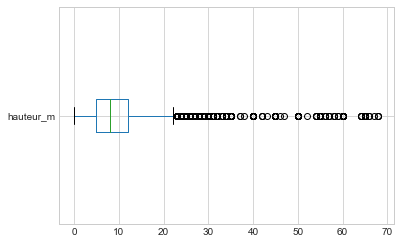

In [42]:
arbres_new.boxplot(column="hauteur_m", vert=False)
plt.show()

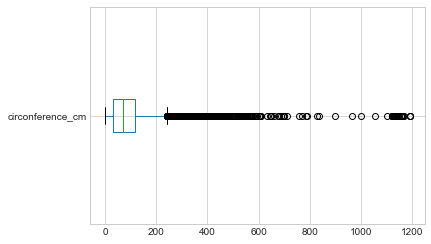

In [43]:
arbres_new.boxplot(column="circonference_cm", vert=False)
plt.show()

Après ce traitement des outliers on voit que dans notre nouveau jeu de données arbres_new:
- Le taux de dispersion des hauteurs est passé de plus de 15035 à 75.49;
- Le taux de dispersion des circonférences est passé de plus de 807 à 80.56;
- Les médianes des deux variables sont restées constantes;
- Les moyennes ont diminuées.

Essayons une autre méthode, celle de Tuckeys pour l'élimination des outiers.

In [8]:
hauteur_Q=[np.percentile(arbres["hauteur_m"], 25), np.percentile(arbres["hauteur_m"], 50), np.percentile(arbres["hauteur_m"], 75)]
circonference_Q=[np.percentile(arbres["circonference_cm"], 25), np.percentile(arbres["circonference_cm"], 50), np.percentile(arbres["circonference_cm"], 75)]
print(hauteur_Q)
print(circonference_Q)

[5.0, 8.0, 12.0]
[30.0, 70.0, 115.0]


In [9]:
hauteur_IQR=hauteur_Q[2]-hauteur_Q[0]
circonference_IQR=circonference_Q[2]-circonference_Q[0]
hauteur_min=hauteur_Q[0]-1.5*hauteur_IQR
hauteur_max=hauteur_Q[2]+1.5*hauteur_IQR
circonference_min=circonference_Q[0]-1.5*circonference_IQR
circonference_max=circonference_Q[2]+1.5*circonference_IQR
print(hauteur_min)
print(hauteur_max)
print(circonference_min)
print(circonference_max)

-5.5
22.5
-97.5
242.5


In [10]:
arbres_tuckeys=arbres.loc[arbres.hauteur_m>hauteur_min]
arbres_tuckeys=arbres_tuckeys.loc[arbres_tuckeys.hauteur_m<hauteur_max]
arbres_tuckeys=arbres_tuckeys.loc[arbres_tuckeys.circonference_cm>circonference_min]
arbres_tuckeys=arbres_tuckeys.loc[arbres_tuckeys.circonference_cm<circonference_max]

In [47]:
arbres_tuckeys.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.939970e+05,193997.000000,193997.000000,132163.000000,193997.000000,193997.000000
mean,3.858860e+05,74.803280,7.925339,0.000590,48.854705,2.347988
std,5.433945e+05,55.373099,5.704763,0.024287,0.030190,0.051345
min,9.987400e+04,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.562580e+05,30.000000,4.000000,0.000000,48.835183,2.307210
50%,2.211530e+05,70.000000,8.000000,0.000000,48.854263,2.350727
75%,2.739740e+05,110.000000,12.000000,0.000000,48.876583,2.387043
max,2.024745e+06,242.000000,22.000000,1.000000,48.911485,2.469759


In [48]:
print("="*20)
print("      hauteur_m       ")
print("="*20)
print("")
print("Moyenne: ", arbres_tuckeys['hauteur_m'].mean())
print("Mode: ", arbres_tuckeys["hauteur_m"].mode())
print("Médiane: ", arbres_tuckeys["hauteur_m"].median())
print("Taux de dispersion: ", (arbres_tuckeys["hauteur_m"].std()/arbres_tuckeys["hauteur_m"].mean())*100)
print("")
print("")
print("="*20)
print("  circonference_cm")
print("="*20)
print("")
print("Moyenne: ", arbres_tuckeys['circonference_cm'].mean())
print("Mode: ", arbres_tuckeys["circonference_cm"].mode())
print("Médiane: ", arbres_tuckeys["circonference_cm"].median())
print("Taux de dispersion: ", (arbres_tuckeys["circonference_cm"].std()/arbres_tuckeys["circonference_cm"].mean())*100)

      hauteur_m       

Moyenne:  7.925339051634819
Mode:  0    0
dtype: int64
Médiane:  8.0
Taux de dispersion:  71.98131468042155


  circonference_cm

Moyenne:  74.80328046309994
Mode:  0    0
dtype: int64
Médiane:  70.0
Taux de dispersion:  74.02496088956413


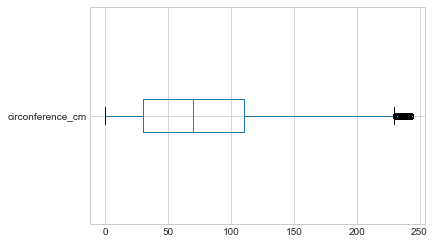

In [49]:
arbres_tuckeys.boxplot(column="circonference_cm", vert=False)
plt.show()

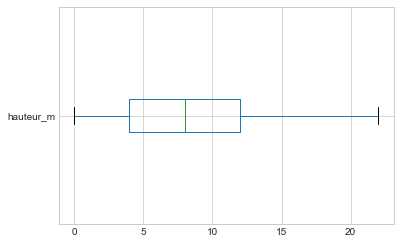

In [50]:
arbres_tuckeys.boxplot(column="hauteur_m", vert=False)
plt.show()

Avec la méthode de Tuckeys, les données sont bien moins dispersées.

### Analyse bivariée <a class="anchor" id="part23"></a>

Afin de mieux coordonner les tournées, nous allons rechercher des corrélations entre les domanialités, les arrondissements, les hauteurs et les circonferences des arbres.

#### Domanialité et hauteur <a class="anchor" id="part231"></a>

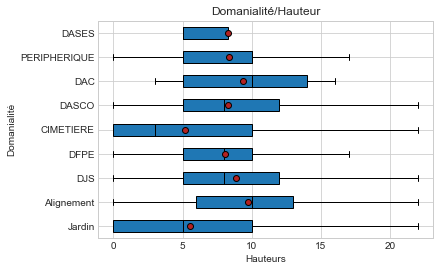

In [18]:
X = "domanialite"
Y = "hauteur_m"


modalites = arbres_tuckeys[X].unique()
groupes = []
for m in modalites:
    groupes.append(arbres_tuckeys[arbres_tuckeys[X]==m][Y])

  
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.xlabel('Hauteurs')
plt.ylabel('Domanialité')
plt.title("Domanialité/Hauteur")
plt.show()

#### Domanialité et circonférence <a class="anchor" id="part232"></a>

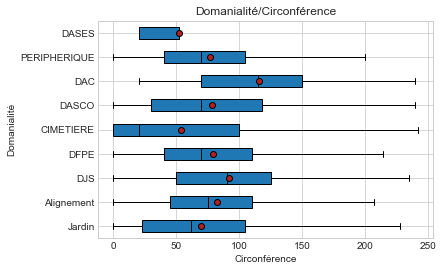

In [13]:
X = "domanialite"
Y = "circonference_cm"


modalites = arbres_tuckeys[X].unique()
groupes = []
for m in modalites:
    groupes.append(arbres_tuckeys[arbres_tuckeys[X]==m][Y])

  
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Circonférence')
plt.ylabel('Domanialité')
plt.title("Domanialité/Circonférence")
plt.show()

#### Arrondissement et hauteur <a class="anchor" id="part233"></a>

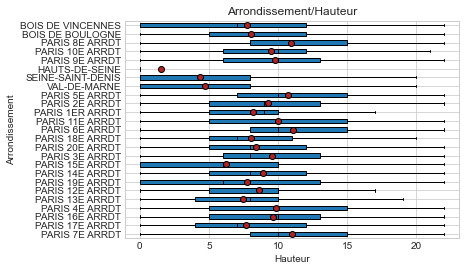

In [14]:
X = "arrondissement"
Y = "hauteur_m"


modalites = arbres_tuckeys[X].unique()
groupes = []
for m in modalites:
    groupes.append(arbres_tuckeys[arbres_tuckeys[X]==m][Y])

  
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Hauteur')
plt.ylabel('Arrondissement')
plt.title("Arrondissement/Hauteur")
plt.show()

#### Arrondissement et circonférence <a class="anchor" id="part234"></a>

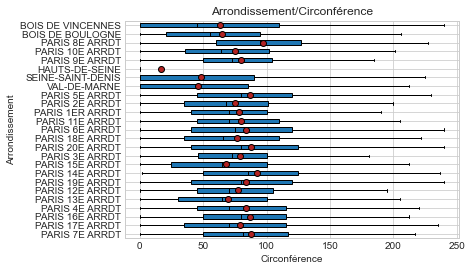

In [15]:
X = "arrondissement"
Y = "circonference_cm"


modalites = arbres_tuckeys[X].unique()
groupes = []
for m in modalites:
    groupes.append(arbres_tuckeys[arbres_tuckeys[X]==m][Y])

  
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel('Circonférence')
plt.ylabel('Arrondissement')
plt.title("Arrondissement/Circonférence")
plt.show()

#### Domanialité et arrondissement <a class="anchor" id="part235"></a>

In [55]:
X = "arrondissement"
Y = "domanialite"

contingence = arbres_tuckeys[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
contingence

domanialite,Alignement,CIMETIERE,DAC,DASCO,DASES,DFPE,DJS,Jardin,PERIPHERIQUE,Total
arrondissement,,,,,,,,,,
BOIS DE BOULOGNE,3945.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3946
BOIS DE VINCENNES,5339.0,NaN,NaN,NaN,NaN,NaN,NaN,5692.0,NaN,11031
HAUTS-DE-SEINE,NaN,5293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5293
PARIS 10E ARRDT,2434.0,NaN,NaN,208.0,NaN,48.0,98.0,407.0,NaN,3195
PARIS 11E ARRDT,4200.0,NaN,NaN,338.0,NaN,94.0,85.0,840.0,NaN,5557
PARIS 12E ARRDT,7607.0,7.0,7.0,464.0,3.0,97.0,468.0,3065.0,542.0,12260
PARIS 13E ARRDT,10713.0,NaN,8.0,862.0,NaN,290.0,731.0,3290.0,346.0,16240
PARIS 14E ARRDT,6976.0,1215.0,NaN,303.0,NaN,79.0,203.0,2191.0,120.0,11087
PARIS 15E ARRDT,8311.0,156.0,NaN,655.0,1.0,115.0,312.0,7166.0,252.0,16968


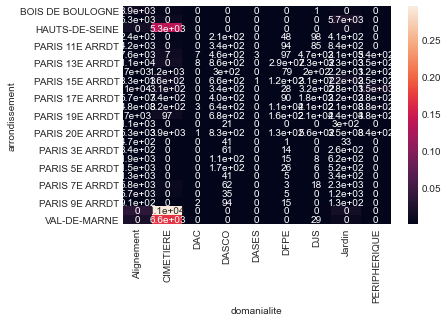

In [56]:
import seaborn as sns

tx = contingence.loc[:,["Total"]]
ty = contingence.loc[["Total"],:]
n = len(arbres_tuckeys)
indep = tx.dot(ty) / n

c = contingence.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

## Synthèse de l'analyse <a class="anchor" id="part3"></a>

Le jeux de données soumis à notre analyse regroupe les observations sur 200137 arbres suivant 18 variables. Parmis ces variables, on distingue *13 variables qualitatives nominales, 3 qualitatives ordinales et 2 quantitatives continues*. 

**18.5% des valeurs du jeu de données sont manquantes**, avec 100% des observations de la variables *numero* manquante, suivi des variables *complement_addresse* et *variete* qui comportent plus de 80% de valeurs manquantes et les variables *remarquable* et *stade_developpement* qui comportent plus de 30% de valeurs manquantes.

Après analyses détaillées des données manquantes on convient de supprimer du jeu de données les variables *variete*, *complement_addresse* et *numero*; de remplacer les valeurs manquantes des variables *genre*, *libelle_francais* et *espece* par la valeur ***Non spécifié*** et de corriger la valeur manquante de la variable *domanialite* par la valeur ***Jardin*** qui semble la plus problable.

Malgré ces traitements une étude supplémentaire via la méthode des quantiles était nécessaire, afin d'éliminer les outliers sur les variables *hauteur_m* et *circonference_cm* qui présentait une trop grande dispersion.

L'analyse de chacune des variables restantes après traitement des erreurs nous permet d'établir que:
- La plus part des arbres sont répartis entre les 12e, 13e, 14e, 15e, 16e, 17e, 18e, 19e et 20e arrondissements;
- Ils sont pour la plus part dans les cimétières, les jardins ou en alignement;
- Certains arbres possèdent des hauteurs et des circonferences de 0; certainement il s'agit de jeunes arbres et la dimension étant inférieure à l'unité a été ramenée à 0;
- La plus part des arbres sont soit des espèces x hispanica, japonica, tomentosa ou hippocastanum; soit des genres Platanus, Aesculus, Tilia, Acer ou Sophora.

L'analyse des mesures de tendance centrale de dispersion et de forme permet de déduire que:
- La moyenne des hauteurs est de 7.93m et celle des circonférences de 74.80cm;
- La taille 0 et la circonférence 0 représentent le groupe d'arbres avec le plus d'effectif, preuve que la plus part des arbres sont de jeunes arbres;
- 50% des arbres ont moins de 8 mètres de hauteur et moins de 70cm de circonférence;
- Les valeurs des hauteurs présentent un taux de dispersion de 75.50% tandis que les valeurs des circonférences présentent un taux de dispersion de 80.56%;
- La distribution des valeurs des hauteurs et des circonférences sont asymétriques et s'étalent vers la droite.

L'analyse des corrélations montre que en moyenne:

- Les arbres les plus hauts sont en alignement (domanialité) et répartis entre le 6ème et le 8ème arrondissement, tandis que les plus courts sont dans les cimétières;
- Les arbres les plus gros (circonférence) sont dans les DAC (domanialité) et dans le 8ème arrondissement, tandis que les plus minces sont dans les DASES (domanialité) et en HAUTS-DE-SEINE.